# Градиентный бустинг

## Исследование датасета по географическому происхождению музыкальных отрывков

Данные взяты из https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(100)

In [2]:
data = pd.read_csv("default_features_1059_tracks.txt", header = None, prefix = 'x')

## EDA

In [3]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


В датасете 70 столбцов. 68 — это разные характеристики музыкальных отрывков, вычисленные в специальном ПО. 2 последних — это широта и долгота. Переименуем столбцы

In [4]:
data.rename(columns = {'x68': 'latitude', 'x69': 'longitude'}, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 70 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x0         1059 non-null   float64
 1   x1         1059 non-null   float64
 2   x2         1059 non-null   float64
 3   x3         1059 non-null   float64
 4   x4         1059 non-null   float64
 5   x5         1059 non-null   float64
 6   x6         1059 non-null   float64
 7   x7         1059 non-null   float64
 8   x8         1059 non-null   float64
 9   x9         1059 non-null   float64
 10  x10        1059 non-null   float64
 11  x11        1059 non-null   float64
 12  x12        1059 non-null   float64
 13  x13        1059 non-null   float64
 14  x14        1059 non-null   float64
 15  x15        1059 non-null   float64
 16  x16        1059 non-null   float64
 17  x17        1059 non-null   float64
 18  x18        1059 non-null   float64
 19  x19        1059 non-null   float64
 20  x20     

In [6]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x60,x61,x62,x63,x64,x65,x66,x67,latitude,longitude
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,...,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,-0.019312,-0.021095,-0.029824,-0.041360,0.025364,0.003521,-0.021183,0.010021,-0.030965,-0.017495,...,0.025828,0.019925,0.025629,0.021065,0.027439,0.019795,0.023401,0.022533,26.651294,38.405656
std,0.987911,0.986098,0.972813,0.984577,0.999363,1.000305,0.989127,1.007714,1.007447,1.017138,...,1.012146,1.009817,1.008802,1.000416,1.000374,1.003078,1.011060,1.007017,18.459432,50.419790
min,-1.529463,-1.476560,-1.133667,-3.222673,-3.386389,-4.366687,-4.291933,-5.287408,-5.281537,-6.856486,...,-1.597512,-1.579654,-1.614369,-1.505952,-1.404766,-1.248702,-1.221595,-1.329595,-35.300000,-88.760000
25%,-0.607617,-0.621808,-0.599230,-0.640634,-0.599677,-0.633760,-0.608229,-0.556419,-0.513522,-0.464189,...,-0.668874,-0.680484,-0.692833,-0.660134,-0.693410,-0.652468,-0.641316,-0.658826,14.660000,3.210000
50%,-0.184135,-0.211257,-0.301310,-0.134986,0.157396,0.011760,0.037887,0.042447,0.074414,0.091507,...,-0.207786,-0.203502,-0.182283,-0.191193,-0.237980,-0.252907,-0.315654,-0.304111,33.660000,32.830000
75%,0.312155,0.310377,0.158689,0.459267,0.735870,0.662538,0.643826,0.574328,0.583657,0.569681,...,0.466648,0.485808,0.488015,0.476027,0.486942,0.326699,0.415290,0.352652,39.910000,74.600000
max,9.439499,10.719304,6.157847,5.926862,2.280230,2.897006,2.720127,3.127494,3.948652,3.492393,...,7.397255,5.336838,8.329566,5.854703,5.442332,6.437855,5.387364,5.977184,54.680000,149.120000


Признаки уже отцентрованы, пустых значений нет

<AxesSubplot:>

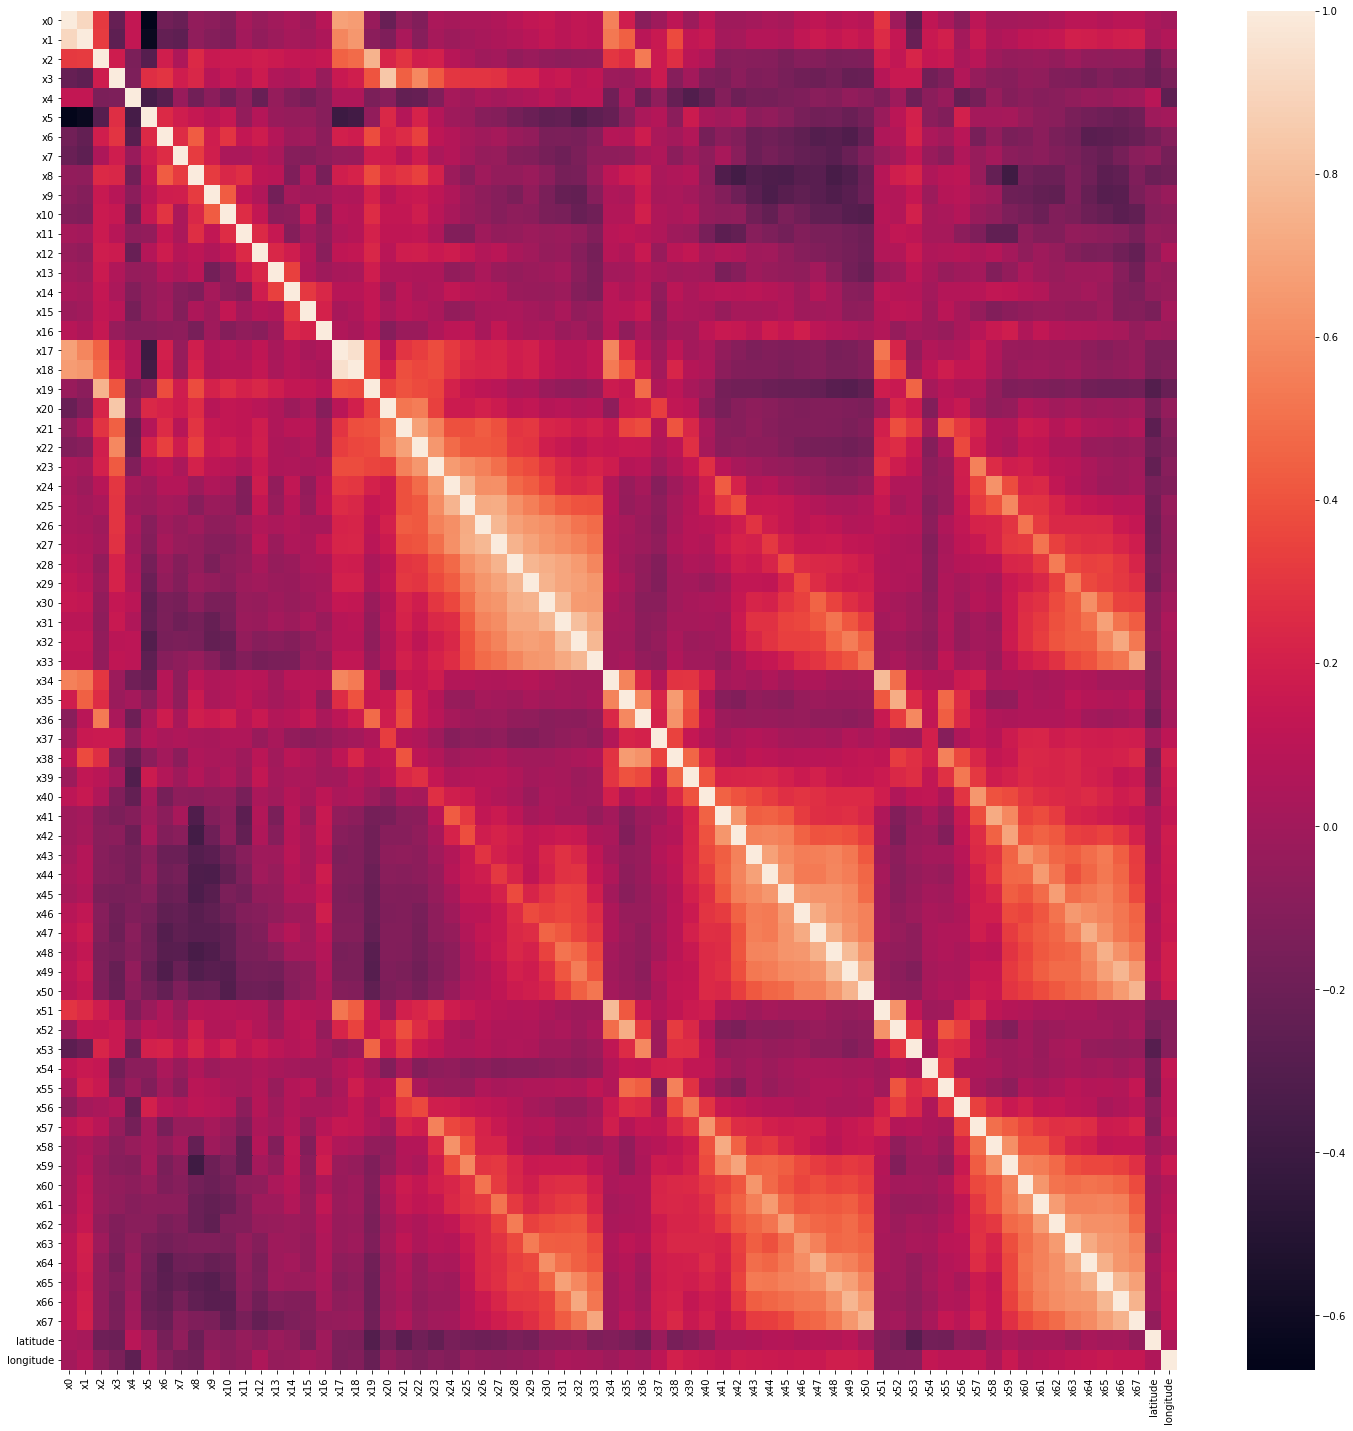

In [7]:
plt.figure(figsize = (25,25))
sns.heatmap(data.corr())

Есть кластеры скореллированных признаков, но так как все они безымянны, оставляем как есть

## Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['latitude','longitude'], axis=1), 
    data[['latitude','longitude']], 
    test_size=0.3
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((741, 68), (318, 68), (741, 2), (318, 2))

## Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Metrics

In [11]:
from sklearn import metrics

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred)
    ]
    return stats

measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2"]})
measured_metrics.set_index("error_type")

""
error_type
MAE
RMSE
R2


## Machine Learning

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor()

rf_regr.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [13]:
y_pred = rf_regr.predict(X_test_scaled)

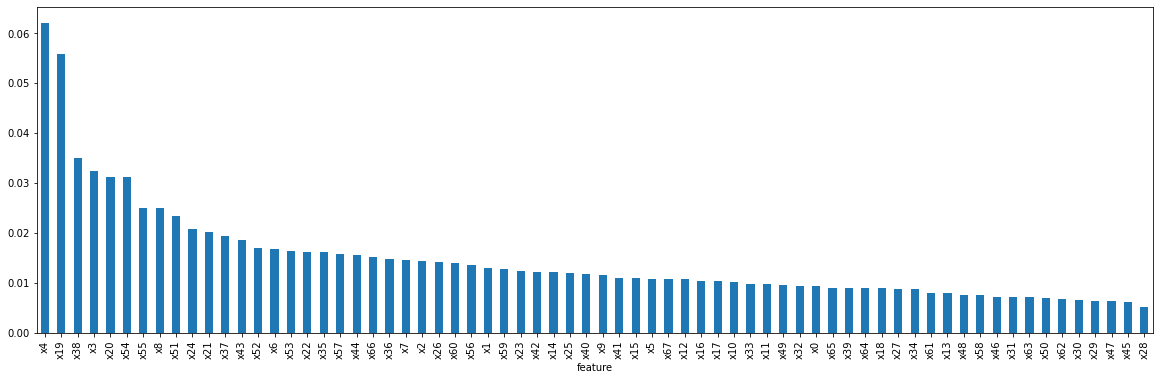

In [14]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": rf_regr.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(20, 6));

Так как все фичи безымянные, особого смысла исследование важности фичей не несёт

Рассчитаем метрики

In [15]:
measured_metrics["Random Forest"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest
0,MAE,23.447897
1,RMSE,32.907878
2,R2,0.243992


Отобразим значения нескольких широт в тестовом наборе и предсказанном с помощью Random Forest

In [16]:
latitudes = pd.DataFrame(y_test['latitude'][:5])
latitudes.rename(columns = {'latitude':'test'}, inplace = True)
latitudes['Random Forest'] = y_pred[:5,0].round(2)
latitudes

,test,Random Forest
384,36.70,25.76
288,19.75,16.74
221,28.61,23.85
769,-35.30,19.41
205,17.98,22.24


То же самое для значений долготы

In [17]:
longitudes = pd.DataFrame(y_test['longitude'][:5])
longitudes.rename(columns = {'longitude':'test'}, inplace = True)
longitudes['Random Forest'] = y_pred[:5,1].round(2)
longitudes

,test,Random Forest
384,3.21,69.52
288,96.10,78.60
221,77.20,27.84
769,149.12,31.59
205,-76.80,3.97


### XGBoost

В нашей модели 2 целевых переменных, но XGBoost, CatBoost, LightGBM настраиваются только для одной. Чтобы исправить это, пользуемся обёрткой MultiOutputRegressor

In [18]:
from xgboost.sklearn import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

xgb_regr = XGBRegressor()
multi_xgb_regr = MultiOutputRegressor(xgb_regr)

multi_xgb_regr.fit(X_train_scaled,y_train);

In [19]:
y_pred = multi_xgb_regr.predict(X_test_scaled)

In [20]:
measured_metrics["XGBoost"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost
0,MAE,23.447897,22.942573
1,RMSE,32.907878,33.362687
2,R2,0.243992,0.228572


In [21]:
latitudes['XGBoost'] = y_pred[:5,0].astype('float64').round(2)
latitudes

,test,Random Forest,XGBoost
384,36.70,25.76,9.26
288,19.75,16.74,22.12
221,28.61,23.85,25.55
769,-35.30,19.41,14.60
205,17.98,22.24,29.63


In [22]:
longitudes['XGBoost'] = y_pred[:5,1].astype('float64').round(2)
longitudes

,test,Random Forest,XGBoost
384,3.21,69.52,89.40
288,96.10,78.60,86.10
221,77.20,27.84,70.23
769,149.12,31.59,37.59
205,-76.80,3.97,9.17


### CatBoost

In [23]:
%%time
from catboost import CatBoostRegressor
cat_regr = CatBoostRegressor(logging_level = 'Silent')
multi_cat_regr = MultiOutputRegressor(cat_regr)

multi_cat_regr.fit(X_train_scaled,y_train)

Wall time: 29.5 s


MultiOutputRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x000001EC8DC9E4C0>)

In [24]:
y_pred = multi_cat_regr.predict(X_test_scaled)

In [25]:
measured_metrics["CatBoost"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost
0,MAE,23.447897,22.942573,22.281936
1,RMSE,32.907878,33.362687,32.257198
2,R2,0.243992,0.228572,0.286893


In [26]:
latitudes['CatBoost'] = y_pred[:5,0].round(2)
latitudes

,test,Random Forest,XGBoost,CatBoost
384,36.70,25.76,9.26,34.25
288,19.75,16.74,22.12,15.49
221,28.61,23.85,25.55,20.70
769,-35.30,19.41,14.60,22.77
205,17.98,22.24,29.63,26.00


In [27]:
longitudes['CatBoost'] = y_pred[:5,1].round(2)
longitudes

,test,Random Forest,XGBoost,CatBoost
384,3.21,69.52,89.40,83.47
288,96.10,78.60,86.10,97.04
221,77.20,27.84,70.23,49.45
769,149.12,31.59,37.59,56.79
205,-76.80,3.97,9.17,-28.72


### LightGBM

In [28]:
from lightgbm import LGBMRegressor
lgbm_regr = LGBMRegressor()
multi_lgfm_regr = MultiOutputRegressor(lgbm_regr);

multi_lgfm_regr.fit(X_train_scaled,y_train)

MultiOutputRegressor(estimator=LGBMRegressor())

In [29]:
y_pred = multi_lgfm_regr.predict(X_test_scaled)

In [30]:
measured_metrics["LightGBM"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost,LightGBM
0,MAE,23.447897,22.942573,22.281936,23.141568
1,RMSE,32.907878,33.362687,32.257198,33.547872
2,R2,0.243992,0.228572,0.286893,0.242824


In [31]:
latitudes['LightGBM'] = y_pred[:5,0].round(2)
latitudes

,test,Random Forest,XGBoost,CatBoost,LightGBM
384,36.70,25.76,9.26,34.25,6.18
288,19.75,16.74,22.12,15.49,18.69
221,28.61,23.85,25.55,20.70,25.36
769,-35.30,19.41,14.60,22.77,19.37
205,17.98,22.24,29.63,26.00,23.68


In [32]:
longitudes['LightGBM'] = y_pred[:5,1].round(2)
longitudes

,test,Random Forest,XGBoost,CatBoost,LightGBM
384,3.21,69.52,89.40,83.47,91.63
288,96.10,78.60,86.10,97.04,95.36
221,77.20,27.84,70.23,49.45,55.49
769,149.12,31.59,37.59,56.79,23.56
205,-76.80,3.97,9.17,-28.72,-27.59


Некоторые широты и долготы модели предсказывают неплохо, некоторые совсем мимо.

### GradientBoostingRegressor

Добавим по совету проверяющего вот такой регрессор «из коробки».

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regr = GradientBoostingRegressor()
multi_gb_regr = MultiOutputRegressor(gb_regr);

multi_gb_regr.fit(X_train_scaled,y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [34]:
y_pred = multi_gb_regr.predict(X_test_scaled)

In [35]:
measured_metrics["Gradient Boosting"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting
0,MAE,23.447897,22.942573,22.281936,23.141568,23.160997
1,RMSE,32.907878,33.362687,32.257198,33.547872,33.241104
2,R2,0.243992,0.228572,0.286893,0.242824,0.249069


In [36]:
latitudes['Gradient Boosting'] = y_pred[:5,0].round(2)
latitudes

,test,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting
384,36.70,25.76,9.26,34.25,6.18,2.48
288,19.75,16.74,22.12,15.49,18.69,20.08
221,28.61,23.85,25.55,20.70,25.36,21.90
769,-35.30,19.41,14.60,22.77,19.37,17.57
205,17.98,22.24,29.63,26.00,23.68,28.25


In [37]:
longitudes['Gradient Boosting'] = y_pred[:5,1].round(2)
longitudes

,test,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting
384,3.21,69.52,89.40,83.47,91.63,85.58
288,96.10,78.60,86.10,97.04,95.36,74.78
221,77.20,27.84,70.23,49.45,55.49,56.17
769,149.12,31.59,37.59,56.79,23.56,26.91
205,-76.80,3.97,9.17,-28.72,-27.59,-20.77


**Для моделей из коробки лучший результат показала CatBoost, хотя и не сильно отличается от обычного Random Forest**

## Cross-Validation

### Random Forest

Используем RandomizedSearchCV и создадим диапазоны изменяемых параметров: число деревьев, число фич для расщепления, глубину деревьев.

In [39]:
%%time
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': np.arange(100,1100,100),
               'max_features': ['auto','sqrt','log2'],
               'max_depth': np.append(np.arange(10,110,10),None)}

rf_random = RandomizedSearchCV(estimator = rf_regr, param_distributions = random_grid, n_iter = 100, cv = 3, n_jobs = -1, verbose = 5)

rf_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.9min finished


Wall time: 14min 5s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], dtype=object),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   verbose=5)

In [40]:
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 60}

Для полученных оптимальных гиперпараметров сделаем новое предсказание

In [41]:
y_pred = rf_random.best_estimator_.predict(X_test_scaled)

In [42]:
measured_metrics["Random Forest CV"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting,Random Forest CV
0,MAE,23.447897,22.942573,22.281936,23.141568,23.160997,22.968033
1,RMSE,32.907878,33.362687,32.257198,33.547872,33.241104,32.220540
2,R2,0.243992,0.228572,0.286893,0.242824,0.249069,0.275815


Метрики выглядят немного лучше

### XGBoost

In [43]:
%%time

random_grid = {'estimator__n_estimators': np.arange(100,1100,100),
               'estimator__subsample': np.arange(0.5,1.1,0.1),
               'estimator__max_depth': np.append(np.arange(10,110,10),None)}

xgb_random = RandomizedSearchCV(estimator = multi_xgb_regr, param_distributions = random_grid, n_iter = 100, cv = 3, n_jobs = -1, verbose = 5)

xgb_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.0min finished


Wall time: 19min 9s


RandomizedSearchCV(cv=3,
                   estimator=MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         gamma=None,
                                                                         gpu_id=None,
                                                                         importance_type='gain',
                                                                         interaction_constraints=None,
                                                                         learning_rate=None,
                                             

In [44]:
xgb_random.best_params_

{'estimator__subsample': 0.8999999999999999,
 'estimator__n_estimators': 1000,
 'estimator__max_depth': None}

In [45]:
y_pred = xgb_random.best_estimator_.predict(X_test_scaled)

In [46]:
measured_metrics["XGBoost CV"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting,Random Forest CV,XGBoost CV
0,MAE,23.447897,22.942573,22.281936,23.141568,23.160997,22.968033,23.245179
1,RMSE,32.907878,33.362687,32.257198,33.547872,33.241104,32.220540,33.802153
2,R2,0.243992,0.228572,0.286893,0.242824,0.249069,0.275815,0.219409


В случае XGBoost метрики с настроенными гиперпараметрами стали чуть хуже

### LightGBM

In [47]:
%%time
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'estimator__n_estimators': np.arange(100,1100,100),
               'estimator__subsample': np.arange(0.5,1.1,0.1),
               'estimator__max_depth': np.append(np.arange(10,110,10),None)}

lgbm_random = RandomizedSearchCV(estimator = multi_lgfm_regr, param_distributions = random_grid, n_iter = 100, cv = 3, n_jobs = -1, verbose = 5)

lgbm_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Wall time: 6min 26s


RandomizedSearchCV(cv=3,
                   estimator=MultiOutputRegressor(estimator=LGBMRegressor()),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'estimator__max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], dtype=object),
                                        'estimator__n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                                        'estimator__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])},
                   verbose=5)

In [48]:
lgbm_random.best_params_

{'estimator__subsample': 0.8999999999999999,
 'estimator__n_estimators': 100,
 'estimator__max_depth': 100}

In [49]:
y_pred = lgbm_random.best_estimator_.predict(X_test_scaled)

In [50]:
measured_metrics["LightGBM CV"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting,CatBoost CV,Gradient Boosting CV,LightGBM CV
0,MAE,23.447897,22.942573,22.281936,23.141568,23.160997,22.352194,22.881757,23.141568
1,RMSE,32.907878,33.362687,32.257198,33.547872,33.241104,32.293749,32.674778,33.547872
2,R2,0.243992,0.228572,0.286893,0.242824,0.249069,0.292038,0.270540,0.242824


В случае LightGBM метрики с настроенными гиперпараметрами почти не изменились

### CatBoost

Этот алгоритм самый ресурсозатратный, поэтому для примера сделаем 27 комбинаций

In [38]:
%%time

from sklearn.model_selection import GridSearchCV

grid = {'estimator__n_estimators': [100,300,500],
        'estimator__subsample': [0.66,0.8,1],
        'estimator__max_depth': [2,4,6]}

cat_random = GridSearchCV(estimator = multi_cat_regr, param_grid = grid, cv = 3, n_jobs = -1, verbose = 5)

cat_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  6.5min finished


Wall time: 6min 44s


GridSearchCV(cv=3,
             estimator=MultiOutputRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x000001EC8DC9E4C0>),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 4, 6],
                         'estimator__n_estimators': [100, 300, 500],
                         'estimator__subsample': [0.66, 0.8, 1]},
             verbose=5)

In [39]:
cat_random.best_params_

{'estimator__max_depth': 6,
 'estimator__n_estimators': 500,
 'estimator__subsample': 0.8}

In [40]:
y_pred = cat_random.best_estimator_.predict(X_test_scaled)

In [41]:
measured_metrics["CatBoost CV"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting,CatBoost CV
0,MAE,23.447897,22.942573,22.281936,23.141568,23.160997,22.352194
1,RMSE,32.907878,33.362687,32.257198,33.547872,33.241104,32.293749
2,R2,0.243992,0.228572,0.286893,0.242824,0.249069,0.292038


В случае CatBoost метрики с настроенными гиперпараметрами почти не изменились

### GradientBoosting

In [51]:
%%time

grid = {'estimator__n_estimators': [100,300,500,700,900],
        'estimator__subsample': [0.66,0.8,1],
        'estimator__max_depth': [2,4,6,8,10]}

gb_random = GridSearchCV(estimator = multi_gb_regr, param_grid = grid, cv = 3, n_jobs = -1, verbose = 5)

gb_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 18.3min finished


Wall time: 18min 39s


GridSearchCV(cv=3,
             estimator=MultiOutputRegressor(estimator=GradientBoostingRegressor()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 4, 6, 8, 10],
                         'estimator__n_estimators': [100, 300, 500, 700, 900],
                         'estimator__subsample': [0.66, 0.8, 1]},
             verbose=5)

In [52]:
gb_random.best_params_

{'estimator__max_depth': 4,
 'estimator__n_estimators': 900,
 'estimator__subsample': 0.8}

In [53]:
y_pred = gb_random.best_estimator_.predict(X_test_scaled)

In [54]:
measured_metrics["Gradient Boosting CV"] = dataframe_metrics(y_test, y_pred)
measured_metrics

,error_type,Random Forest,XGBoost,CatBoost,LightGBM,Gradient Boosting,CatBoost CV,Gradient Boosting CV,LightGBM CV
0,MAE,23.447897,22.942573,22.281936,23.141568,23.160997,22.352194,23.246674,23.141568
1,RMSE,32.907878,33.362687,32.257198,33.547872,33.241104,32.293749,33.458532,33.547872
2,R2,0.243992,0.228572,0.286893,0.242824,0.249069,0.292038,0.230178,0.242824


В случае стандартного GradientBoosting метрики с настроенными гиперпараметрами почти не изменились

### Выводы

Лучше всех показал себя алгоритм CatBoost из коробки. Все другие модели не дали лучшего качества даже с настроенными гиперпараметрами. Сам CatBoost, к сожалению, не удалось должным образом настроить из-за слишком долгого времени выполнения.